<a href="https://colab.research.google.com/github/SGRGit/gwOsc/blob/Main/DataPrepBlipGlitches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

In [0]:
import gwpy

In [0]:
from gwpy.timeseries import TimeSeries

In [0]:
from numpy import random
series = TimeSeries(random.random(1000), sample_rate=100, unit='m')

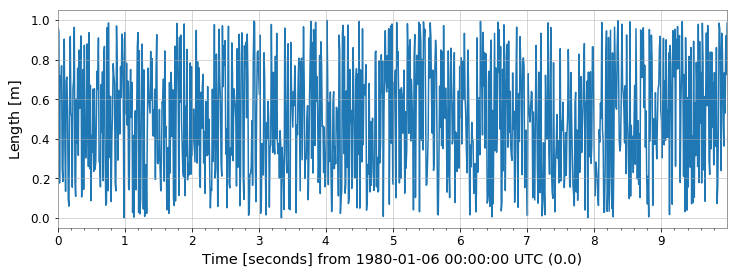

In [7]:
plot = series.plot()
plot.show()

In [8]:
from gwpy.timeseries import TimeSeries
data = TimeSeries.fetch_open_data('L1', 1131350417, 1131357617)

/usr/local/lib/python3.6/dist-packages/gwpy/types/series.py:921: UserWarning: TimeSeries.crop given end larger than current end, crop will end when the Series actually ends.
  % type(self).__name__)
/usr/local/lib/python3.6/dist-packages/gwpy/types/series.py:912: UserWarning: TimeSeries.crop given start smaller than current start, crop will begin when the Series actually starts.
  % type(self).__name__)


In [9]:
data

<TimeSeries([ 1.60496303e-19,  1.67975747e-19,  1.75019344e-19,
             ..., -5.58550615e-19, -5.28749911e-19,
             -5.67202288e-19]
            unit=Unit(dimensionless),
            t0=<Quantity 1.13135042e+09 s>,
            dt=<Quantity 0.00024414 s>,
            name='Strain',
            channel=None)>

In [0]:
amp, phase = data.demodulate(331.3, stride=60)

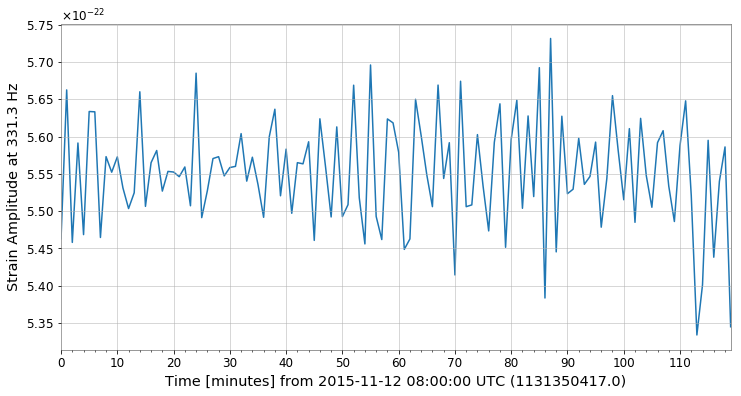

In [12]:
from gwpy.plot import Plot
plot = Plot(amp)
ax = plot.gca()
ax.set_ylabel('Strain Amplitude at 331.3 Hz')
plot.show()